In [337]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import glob
from astropy.io import fits
from astropy.table import Table
import seaborn as sns
from sklearn.metrics import r2_score
import pandas as pd

In [8]:
tablename = './stellar-kinematics_catalogue_dr2.fits'
cat = Table.read(tablename, hdu=1)
print(cat.columns)

<TableColumns names=('CATID','STELKIN_FILE','OBS_DATE','RA','DEC','LMSTAR','Z_CAT','GMINUSI','HWHM_PSF','RE','RE_CIRC_KPC','ELLIP','N_SERSIC','PA_PHOT','PA_STELKIN','E_PA_STELKIN','PA_GASKIN','E_PA_GASKIN','MTYPE','RMAX_VSIGMA','SIGMA_RE','E_SIGMA_RE','SN_SIGMA_RE','APER_CORR_FLAG','RMAX_APER_CORR','LAMBDAR_RE','E_LAMBDAR_RE','LAMBDAR_MAX','E_LAMBDAR_MAX','VSIGMA_RE','E_VSIGMA_RE','VSIGMA_MAX','E_VSIGMA_MAX','MEAN_K51_RE','E_MEAN_K51_RE')>


In [12]:
df = cat.to_pandas()
df.head()

,CATID,STELKIN_FILE,OBS_DATE,RA,DEC,LMSTAR,Z_CAT,GMINUSI,HWHM_PSF,RE,...,LAMBDAR_RE,E_LAMBDAR_RE,LAMBDAR_MAX,E_LAMBDAR_MAX,VSIGMA_RE,E_VSIGMA_RE,VSIGMA_MAX,E_VSIGMA_MAX,MEAN_K51_RE,E_MEAN_K51_RE
0,7715,b'7715_blue_red_7_Y14SAR4_P002_12T064.fits.gz ',b'20140523',179.228729,0.723920,10.99,0.07798,1.29,0.934038,4.608264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7839,b'7839_blue_red_7_Y16SAR4_P002_12T101.fits.gz ',b'20170419',179.615417,0.717906,11.05,0.04749,1.28,0.794309,7.311213,...,0.309256,0.004848,NaN,NaN,0.314731,0.004307,NaN,NaN,0.041178,0.005640
2,7841,b'7841_blue_red_7_Y14SAR4_P002_12T064.fits.gz ',b'20140523',179.608826,0.713106,10.96,0.07852,1.24,0.934038,2.939639,...,0.511994,0.005815,NaN,NaN,0.648815,0.008686,NaN,NaN,0.011217,0.002566
3,7946,b'7946_blue_red_7_Y16SAR4_P002_12T101.fits.gz ',b'20170419',179.934769,0.635369,10.92,0.10295,1.24,0.794309,2.834650,...,0.419271,0.008561,NaN,NaN,0.472199,0.010453,NaN,NaN,0.028757,0.007973
4,7969,b'7969_blue_red_7_Y16SAR4_P002_12T101.fits.gz ',b'20170419',180.033646,0.673850,11.02,0.08554,1.32,0.794309,4.333200,...,0.081036,0.007417,NaN,NaN,0.085886,0.006725,NaN,NaN,0.215161,0.147464


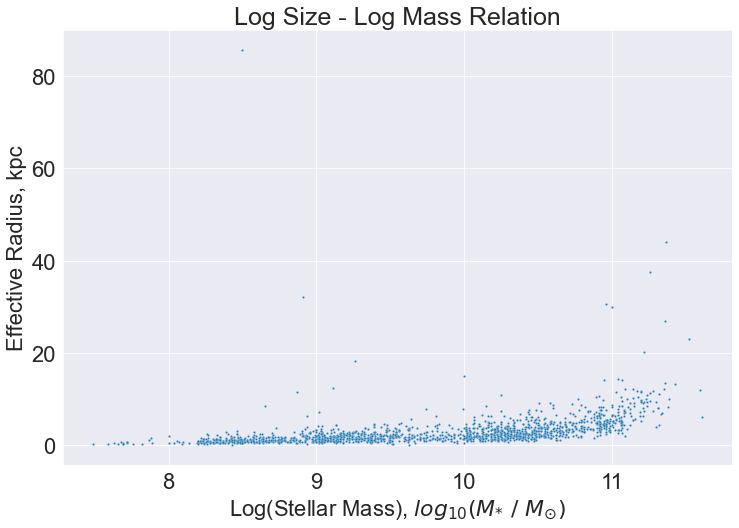

In [13]:
plt.figure(figsize=(12,8))
sns.set_style("darkgrid")
sns.scatterplot(x='LMSTAR', y='RE_CIRC_KPC', data=df, s=5, alpha=1)
plt.xlabel(r'Log(Stellar Mass), $log_{10} (M_{*} \ / \ M_{\odot})$', fontsize=22)
plt.ylabel('Effective Radius, kpc',fontsize=22)
plt.title('Log Size - Log Mass Relation', fontsize=25)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.show()

Stellar Mass Range

In [17]:
df['LMSTAR'].max() - df['LMSTAR'].min()

4.119999885559082

Median Effective Radius

In [15]:
df['RE_CIRC_KPC'].median()

2.1376090049743652

Size-Mass Relation for Early and Late Types


In [33]:
early_filter = df[df['MTYPE'] < 2.0]
late_filter = df[df['MTYPE'] >=2.0]

In [196]:
min(min(early_filter['LMSTAR'].to_numpy()), min(late_filter['LMSTAR'].to_numpy()))

7.49

In [215]:
df['MTYPE'].unique()

array([ 0.5,  1.5,  2. ,  1. ,  3. , -9. ,  0. ,  2.5,  5. ],
      dtype=float32)

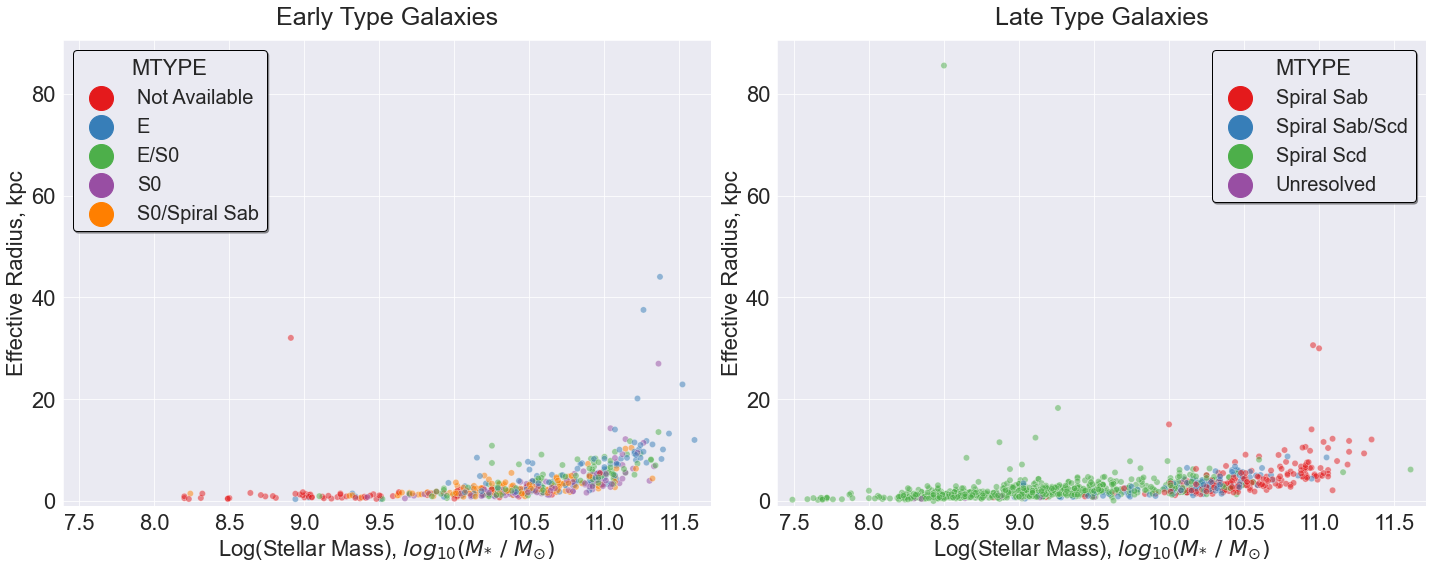

In [247]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
sns.set_style("darkgrid")
sns.scatterplot(x='LMSTAR', y='RE_CIRC_KPC', data=early_filter, s=40, alpha=0.5, ax=ax[0], hue='MTYPE', palette='Set1')
mtype_class = {0.0: 'E', 1.0: 'S0', 2.0: 'Spiral Sab', 3.0: 'Spiral Scd', 5.0: 'Unresolved', 0.5: 'E/S0', 1.5: 'S0/Spiral Sab', 2.5: 'Spiral Sab/Scd', -9.: 'Not Available'}

xmin = min(min(early_filter['LMSTAR'].to_numpy()), min(late_filter['LMSTAR'].to_numpy()))
xmax = max(max(early_filter['LMSTAR'].values), max(late_filter['LMSTAR'].values))
ymin = min(min(early_filter['RE_CIRC_KPC'].to_numpy()), min(late_filter['RE_CIRC_KPC'].to_numpy()))
ymax = max(max(early_filter['RE_CIRC_KPC'].values), max(late_filter['RE_CIRC_KPC'].values))

ax[0].set_title('Early Type Galaxies', fontsize=25, y=1.02)
ax[0].set_xlabel(r'Log(Stellar Mass), $log_{10} (M_{*} \ / \ M_{\odot})$', fontsize=22)
ax[0].set_ylabel('Effective Radius, kpc',fontsize=22)
ax[0].tick_params(axis='both', which='major', labelsize=22)
ax[0].set_xlim(xmin-0.1, xmax+0.1)
ax[0].set_ylim(-1, ymax+5)


sns.scatterplot(x='LMSTAR', y='RE_CIRC_KPC', data=late_filter, s=40, alpha=0.5,ax=ax[1], hue='MTYPE', palette='Set1')
ax[1].set_title('Late Type Galaxies', fontsize=25, y=1.02)
ax[1].set_xlabel(r'Log(Stellar Mass), $log_{10} (M_{*} \ / \ M_{\odot})$', fontsize=22)
ax[1].set_ylabel('Effective Radius, kpc',fontsize=22)
ax[1].tick_params(axis='both', which='major', labelsize=22)
ax[1].set_xlim(xmin-0.1, xmax+0.1)
ax[1].set_ylim(-1, ymax+5)

handles, labels = ax[0].get_legend_handles_labels()
labels = [mtype_class[float(label)] for label in labels]
ax[0].legend(handles, labels, fontsize=20, loc='upper left', markerscale=4, frameon=True, edgecolor='black', fancybox=True, shadow=True, title='MTYPE', title_fontsize=22)

handles, labels = ax[1].get_legend_handles_labels()
labels = [mtype_class[float(label)] for label in labels]
ax[1].legend(handles, labels, fontsize=20, loc='upper right', markerscale=4, frameon=True, edgecolor='black', fancybox=True, shadow=True, title='MTYPE', title_fontsize=22)



plt.tight_layout()
plt.show()

Average Effective Radius for Early and Late Types

In [38]:
print('Early type: ', str(early_filter['RE_CIRC_KPC'].mean()))
print('Late type: ', str(late_filter['RE_CIRC_KPC'].mean()))

Early type:  3.722346067428589
Late type:  2.667081117630005


## Part 4 - Maximum Rotational Velcoity

In [39]:
catid_1, catid_2 = 7841, 7839

In [50]:
filename1 = str((glob.glob('stelkin_maps/'+str(catid_1)+'*.fits'))[0])
filename2 = str((glob.glob('stelkin_maps/'+str(catid_2)+'*.fits'))[0])
dat1 = fits.open(filename1)
dat2 = fits.open(filename2)

In [136]:
dat1_vel = dat1['VEL'].data
dat1_vel_err= dat1['VEL_ERR'].data

dat2_vel = dat2['VEL'].data
dat2_vel_err= dat2['VEL_ERR'].data

In [313]:
dat1.info()

Filename: stelkin_maps/7841_blue_red_7_Y14SAR4_P002_12T064_kinematicsM2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  FLUX          1 ImageHDU        11   (50, 50)   float64   
  2  FLUX_ERR      1 ImageHDU        11   (50, 50)   float64   
  3  VEL           1 ImageHDU        11   (50, 50)   float64   
  4  VEL_ERR       1 ImageHDU        11   (50, 50)   float64   
  5  SIG           1 ImageHDU        11   (50, 50)   float64   
  6  SIG_ERR       1 ImageHDU        11   (50, 50)   float64   
  7  FORMAL_SNR    1 ImageHDU        10   (50, 50)   float64   
  8  QC            1 ImageHDU        19   (8, 50, 50)   float64   
  9  FLUX_BINNED_ADAPTIVE    1 ImageHDU        11   (50, 50)   float64   
 10  FLUX_ERR_BINNED_ADAPTIVE    1 ImageHDU        11   (50, 50)   float64   
 11  VEL_BINNED_ADAPTIVE    1 ImageHDU        11   (50, 50)   float64   
 12  VEL_ERR_BINNED_ADAPTIVE    1 ImageHDU        11   (50, 50)   floa

In [137]:
dat1_vel = dat1_vel[np.where((dat1_vel_err< 30) & (np.isfinite(dat1_vel_err)))]
dat2_vel = dat2_vel[np.where((dat2_vel_err< 30) & (np.isfinite(dat2_vel_err)))]

In [138]:
np.argmax(dat1_vel), dat1_vel[np.argmax(dat1_vel)]

(278, 1999.9999999999998)

In [139]:
dat1_vel_no = np.delete(dat1_vel, np.argmax(dat1_vel))

Median velocity of each galaxy

In [140]:
print(np.median(dat1_vel))
print(np.median(dat2_vel))

-23.88599071543036
-86.37613734349291


Velocity Distribution

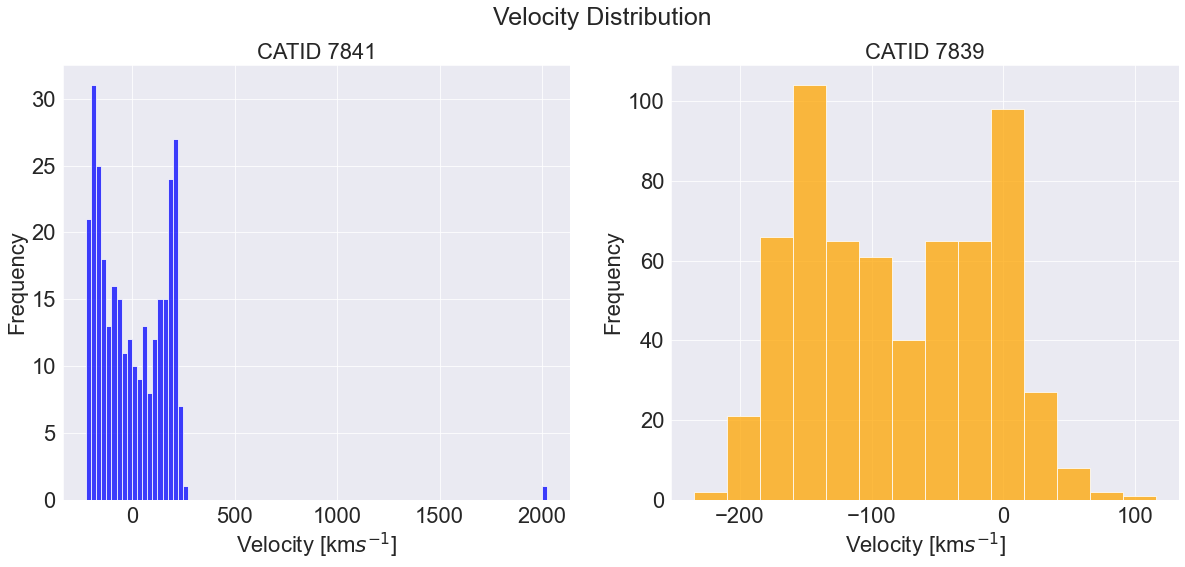

In [141]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
plt.suptitle('Velocity Distribution', fontsize=25)
ax[0].set_xlabel('Velocity [km$s^{-1}$]', fontsize=22)
ax[0].set_ylabel('Frequency', fontsize=22)
ax[0].set_title('CATID 7841', fontsize=22)
ax[0].tick_params(axis='both', which='major', labelsize=22)

ax[1].set_xlabel('Velocity [km$s^{-1}$]', fontsize=22)
ax[1].set_ylabel('Frequency', fontsize=22)
ax[1].set_title('CATID 7839', fontsize=22)
ax[1].tick_params(axis='both', which='major', labelsize=22)
binwidth = 25
n_bins1 = np.arange(min(dat1_vel), max(dat1_vel) + binwidth, binwidth)
n_bins2 = np.arange(min(dat2_vel), max(dat2_vel) + binwidth, binwidth)
ax[0].hist(dat1_vel, bins=n_bins1, density=False, facecolor='b', alpha=0.75)
ax[1].hist(dat2_vel, bins=n_bins2, density=False, facecolor='orange', alpha=0.75)
plt.show()

Velocity correction

In [142]:
dat1_vel_corrected7841 = dat1_vel - np.median(dat1_vel)
dat2_vel_corrected7839 = dat2_vel - np.median(dat2_vel)

In [143]:
print(np.median(dat1_vel_corrected7841))
print(np.median(dat2_vel_corrected7839))

-1.7763568394002505e-15
0.0


Max velocity of each galaxy

In [144]:
np.max(dat1_vel_corrected7841), np.min(dat1_vel_corrected7841)

(2023.8859907154301, -202.41474500574546)

In [145]:
np.max(dat2_vel_corrected7839), np.min(dat2_vel_corrected7839)

(188.27187765730673, -148.13387793535526)

Velocity histogram technique

In [146]:
vel1_sorted = np.sort(np.abs(dat1_vel_corrected7841))
vel2_sorted = np.sort(np.abs(dat2_vel_corrected7839))

vel1_idx = int(0.9*len(vel1_sorted))
vel2_idx = int(0.9*len(vel2_sorted))

print('Max Vel 7841: ', vel1_sorted[vel1_idx])
print('Max Vel 7839: ', vel2_sorted[vel2_idx])

Max Vel 7841:  224.0302644790072
Max Vel 7839:  100.80730092875137


## Part 5 - Tully Fisher Relation

In [299]:
def calculate_vmax(catid):
  try:
    file = (glob.glob('./stelkin_maps/'+str(catid)+'*.fits'))
    #print(file)
    filename = str(file[0])
    dat = fits.open(filename)
    vel = dat['VEL'].data
    vel_err = dat['VEL_ERR'].data
    vel_new = vel[np.where((vel_err < 30) & (np.isfinite(vel_err)))]
    vel_corrected = vel_new - np.median(vel_new)
    abs_vel = np.abs(vel_corrected)
    vel_sorted = np.sort(abs_vel)
    idx = int(0.9 *len(vel_sorted))
    vmax = vel_sorted[idx]
    return vmax
  except:
    return np.nan

In [300]:
calculate_vmax(7841) 

224.0302644790072

Apply to entire catalogue

In [301]:
df.head()

,CATID,STELKIN_FILE,OBS_DATE,RA,DEC,LMSTAR,Z_CAT,GMINUSI,HWHM_PSF,RE,...,LAMBDAR_MAX,E_LAMBDAR_MAX,VSIGMA_RE,E_VSIGMA_RE,VSIGMA_MAX,E_VSIGMA_MAX,MEAN_K51_RE,E_MEAN_K51_RE,vmax,vmax_log10
0,7715,b'7715_blue_red_7_Y14SAR4_P002_12T064.fits.gz ',b'20140523',179.228729,0.723920,10.99,0.07798,1.29,0.934038,4.608264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.878996,2.148846
1,7839,b'7839_blue_red_7_Y16SAR4_P002_12T101.fits.gz ',b'20170419',179.615417,0.717906,11.05,0.04749,1.28,0.794309,7.311213,...,NaN,NaN,0.314731,0.004307,NaN,NaN,0.041178,0.005640,167.444711,2.223871
2,7841,b'7841_blue_red_7_Y14SAR4_P002_12T064.fits.gz ',b'20140523',179.608826,0.713106,10.96,0.07852,1.24,0.934038,2.939639,...,NaN,NaN,0.648815,0.008686,NaN,NaN,0.011217,0.002566,207.712216,2.317462
3,7946,b'7946_blue_red_7_Y16SAR4_P002_12T101.fits.gz ',b'20170419',179.934769,0.635369,10.92,0.10295,1.24,0.794309,2.834650,...,NaN,NaN,0.472199,0.010453,NaN,NaN,0.028757,0.007973,196.967522,2.294395
4,7969,b'7969_blue_red_7_Y16SAR4_P002_12T101.fits.gz ',b'20170419',180.033646,0.673850,11.02,0.08554,1.32,0.794309,4.333200,...,NaN,NaN,0.085886,0.006725,NaN,NaN,0.215161,0.147464,39.339556,1.594829


In [302]:
df['vmax'] = df['CATID'].apply(calculate_vmax)

/Users/joshua/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [303]:
df['vmax_log10'] = np.log10(df['vmax'])

/Users/joshua/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [304]:
early_type_filtered = df[df['MTYPE'] < 2.0]
late_type_filtered = df[df['MTYPE'] >= 2.0]

In [305]:
def tf_relation(x):
    return 2.179 + 0.259 * (x - 10.3)

In [306]:
x_tf = np.linspace(7.28999, 11.80999, 1000)
y_tf = tf_relation(x_tf)

Compute Fits

In [376]:
df['vmax_log10'] = df['vmax_log10'].replace(-np.inf, np.nan)

In [377]:
len(df['vmax_log10'])

1559

In [395]:
df_no_nans = df.dropna(subset=['vmax_log10'])
y_true_all = df_no_nans['vmax_log10']
y_pred_all = tf_relation(df_no_nans['LMSTAR'])

y_true_early = df_no_nans[df_no_nans['MTYPE'] < 2.0]['vmax_log10']
y_pred_early = tf_relation(df_no_nans[df_no_nans['MTYPE'] < 2.0]['LMSTAR'])

y_true_late = df_no_nans[df_no_nans['MTYPE'] >= 2.0]['vmax_log10']
y_pred_late = tf_relation(df_no_nans[df_no_nans['MTYPE'] >= 2.0]['LMSTAR'])


In [397]:
r2_all = r2_score(y_true_all, y_pred_all)
r2_early = r2_score(y_true_early, y_pred_early)
r2_late = r2_score(y_true_late, y_pred_late)
print('R2 All: ', r2_all)
print('R2 Early: ', r2_early)
print('R2 Late: ', r2_late)

R2 All:  -0.5401823923043587
R2 Early:  -1.4267753189751353
R2 Late:  -0.044152242624101


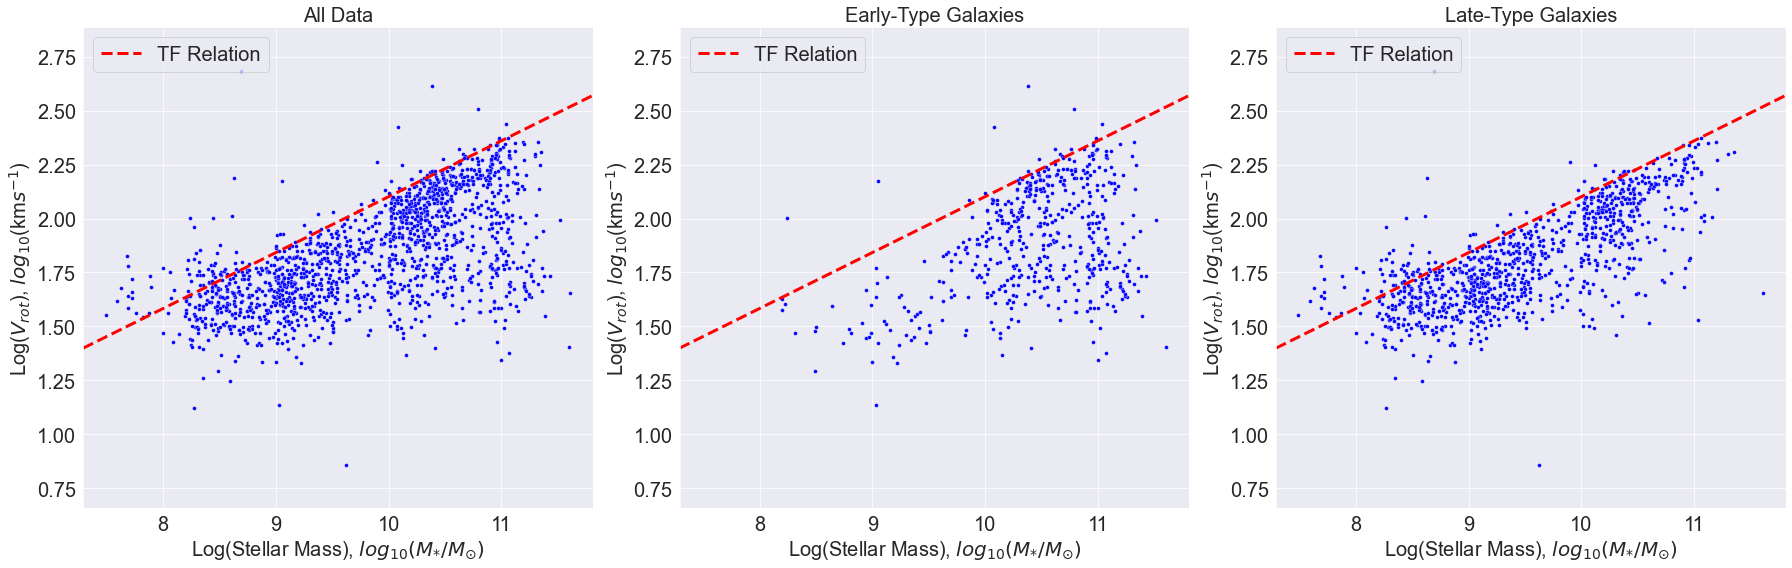

In [375]:
fig, ax = plt.subplots(1, 3, figsize=(25, 8))
sns.scatterplot(x='LMSTAR', y='vmax_log10', data=df, ax=ax[0], s=15, color='b')
ax[0].plot(x_tf, y_tf, color='r', ls='--', linewidth=3, label='TF Relation')
ax[0].set_xlabel('Log(Stellar Mass), $log_{10}(M_{*}/M_{\odot})$', fontsize=20)
ax[0].set_ylabel('Log($V_{rot}$), $log_{10}$(km$s^{-1}$)', fontsize=20)
ax[0].set_title('All Data', fontsize=20)
ax[0].tick_params(axis='both', which='major', labelsize=20)
ax[0].legend(loc='upper left', fontsize=20)

sns.scatterplot(x='LMSTAR', y='vmax_log10', data=early_type_filtered, ax=ax[1], s=15, color='b')
ax[1].plot(x_tf, y_tf, color='r', ls='--', linewidth=3, label='TF Relation')
ax[1].set_xlabel('Log(Stellar Mass), $log_{10}(M_{*}/M_{\odot})$', fontsize=20)
ax[1].set_ylabel('Log($V_{rot}$), $log_{10}$(km$s^{-1}$)', fontsize=20)
ax[1].set_title('Early-Type Galaxies', fontsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=20)
ax[1].legend(loc='upper left', fontsize=20)

sns.scatterplot(x='LMSTAR', y='vmax_log10', data=late_type_filtered, ax=ax[2], s=15, color='b')
ax[2].plot(x_tf, y_tf, color='r', ls='--', linewidth=3, label='TF Relation')
ax[2].set_xlabel('Log(Stellar Mass), $log_{10}(M_{*}/M_{\odot})$', fontsize=20)
ax[2].set_ylabel('Log($V_{rot}$), $log_{10}$(km$s^{-1}$)', fontsize=20)
ax[2].set_title('Late-Type Galaxies', fontsize=20)
ax[2].tick_params(axis='both', which='major', labelsize=20)
ax[2].legend(loc='upper left', fontsize=20)


# set the limits based on finite values
finite_vmax_log = df['vmax_log10'][np.isfinite(df['vmax_log10'])]
finite_LMSTAR = df['LMSTAR'][np.isfinite(df['LMSTAR'])]

padding_x = 0.2
padding_y = 0.2

ax[0].set_xlim(np.nanmin(finite_LMSTAR) - padding_y, np.nanmax(finite_LMSTAR) + padding_y)
ax[1].set_xlim(np.nanmin(finite_LMSTAR)- padding_y, np.nanmax(finite_LMSTAR) + padding_y)
ax[2].set_xlim(np.nanmin(finite_LMSTAR)- padding_y, np.nanmax(finite_LMSTAR)+ padding_y)

ax[0].set_ylim(np.nanmin(finite_vmax_log) - padding_x, np.nanmax(finite_vmax_log) + padding_x)
ax[1].set_ylim(np.nanmin(finite_vmax_log) - padding_x, np.nanmax(finite_vmax_log) + padding_x)
ax[2].set_ylim(np.nanmin(finite_vmax_log) - padding_x, np.nanmax(finite_vmax_log) + padding_x)
plt.tight_layout()

plt.show()

Plotting velocities without the corrections leads to a better fit, espcially for late-type galaxies.

## Faber-Jackson Relation

In [314]:
def calculate_sigMax(catid):
  try:
    file = (glob.glob('./stelkin_maps/'+str(catid)+'*.fits'))
    #print(file)
    filename = str(file[0])
    dat = fits.open(filename)
    sig = dat['SIG'].data
    sig_err = dat['SIG_ERR'].data
    sig_new = sig[np.where((sig_err < 30) & (np.isfinite(sig_err)))]
    abs_sig = np.abs(sig_new) # no corerection
    sig_sorted = np.sort(abs_sig)
    idx = int(0.9 *len(sig_sorted))
    sigmax = sig_sorted[idx]
    return sigmax
  except:
    return np.nan

In [320]:
df['sigmax'] = df['CATID'].apply(calculate_sigMax) 

In [322]:
df['sigmax_log10'] = np.log10(df['sigmax'])

In [327]:
early_type_filtered = df[df['MTYPE'] < 2.0]
late_type_filtered = df[df['MTYPE'] >= 2.0]

In [334]:
def fj_relation(x):
    return 2.051 + 0.286 * (x - 10.3)
x_fj = np.linspace(7.28999, 11.80999, 1000)
y_fj = tf_relation(x_fj)

In [411]:
nan_idx = np.where(np.isnan(df['sigmax_log10']))[0]

In [418]:
df_no_nans_sig = df.drop(nan_idx)

In [423]:
y_true_all_sig = df_no_nans_sig['sigmax_log10']
y_pred_all_sig = fj_relation(df_no_nans_sig['LMSTAR'])

y_true_early_sig = df_no_nans_sig[df_no_nans_sig['MTYPE'] < 2.0]['sigmax_log10']
y_pred_early_sig = fj_relation(df_no_nans_sig[df_no_nans_sig['MTYPE'] < 2.0]['LMSTAR'])

y_true_late_sig = df_no_nans_sig[df_no_nans_sig['MTYPE'] >= 2.0]['sigmax_log10']
y_pred_late_sig = fj_relation(df_no_nans_sig[df_no_nans_sig['MTYPE'] >= 2.0]['LMSTAR'])

r2_all_sig = r2_score(y_true_all_sig, y_pred_all_sig)
r2_early_sig = r2_score(y_true_early_sig, y_pred_early_sig)
r2_late_sig = r2_score(y_true_late_sig, y_pred_late_sig)

print('R2 All: ', r2_all_sig)
print('R2 Early: ', r2_early_sig)
print('R2 Late: ', r2_late_sig)

R2 All:  0.3170864333176019
R2 Early:  0.28417237963085884
R2 Late:  0.18395959424826636


In [440]:
df['sigmax_log10'].min()

-0.2282816574530769

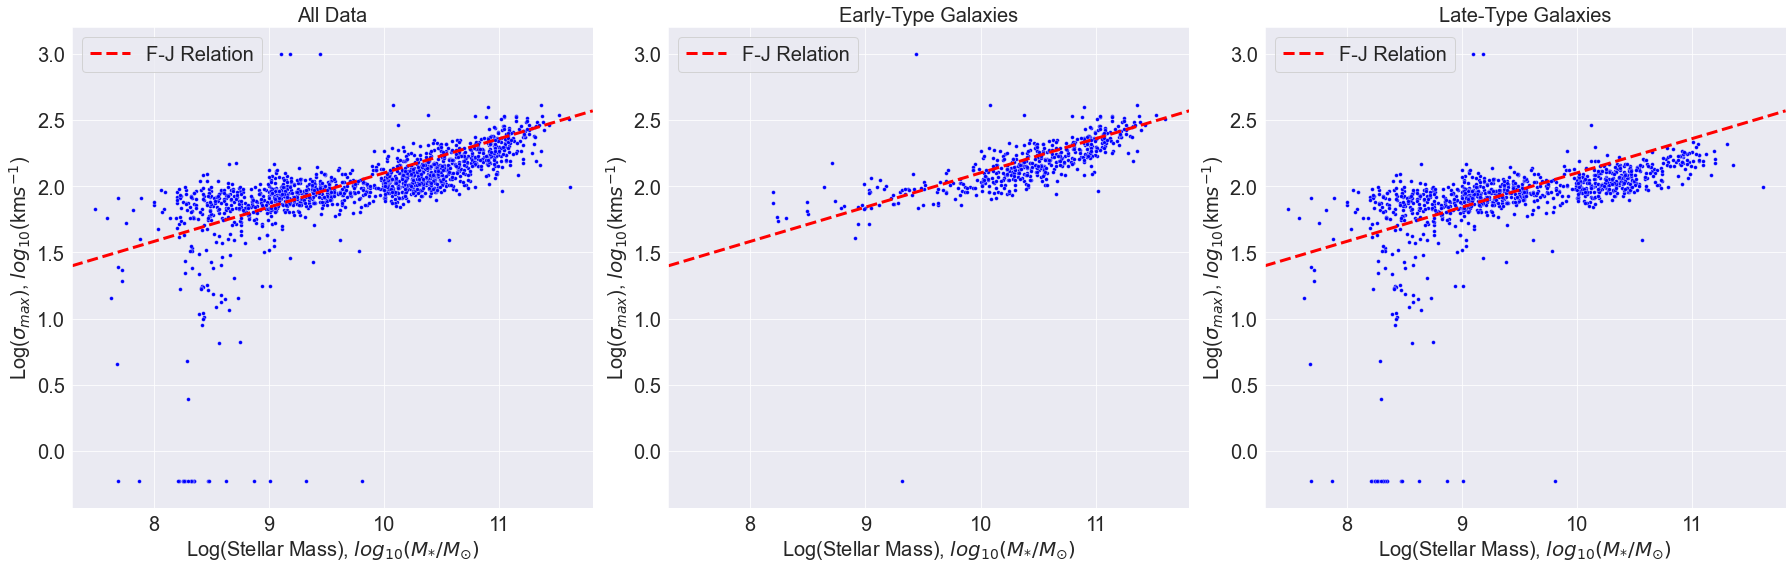

In [435]:
fig, ax = plt.subplots(1, 3, figsize=(25, 8))
mtype_class = {0.0: 'E', 1.0: 'S0', 2.0: 'Spiral Sab', 3.0: 'Spiral Scd', 5.0: 'Unresolved', 0.5: 'E/S0', 1.5: 'S0/Spiral Sab', 2.5: 'Spiral Sab/Scd', -9.: 'Not Available'}
sns.scatterplot(x='LMSTAR', y='sigmax_log10', data=df, ax=ax[0], s=15, color='b')
ax[0].plot(x_fj, y_fj, color='r', ls='--', linewidth=3, label='F-J Relation')
ax[0].set_xlabel('Log(Stellar Mass), $log_{10}(M_{*}/M_{\odot})$', fontsize=20)
ax[0].set_ylabel('Log($\sigma_{max}$), $log_{10}$(km$s^{-1}$)', fontsize=20)
ax[0].set_title('All Data', fontsize=20)
ax[0].tick_params(axis='both', which='major', labelsize=20)
ax[0].legend(loc='upper left', fontsize=20)

sns.scatterplot(x='LMSTAR', y='sigmax_log10', data=early_type_filtered, ax=ax[1], s=15, color='b')
ax[1].plot(x_fj, y_fj, color='r', ls='--', linewidth=3, label='F-J Relation')
ax[1].set_xlabel('Log(Stellar Mass), $log_{10}(M_{*}/M_{\odot})$', fontsize=20)
ax[1].set_ylabel('Log($\sigma_{max}$), $log_{10}$(km$s^{-1}$)', fontsize=20)
ax[1].set_title('Early-Type Galaxies', fontsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=20)
ax[1].legend(loc='upper left', fontsize=20)

sns.scatterplot(x='LMSTAR', y='sigmax_log10', data=late_type_filtered, ax=ax[2], s=15, color='b')
ax[2].plot(x_fj, y_fj, color='r', ls='--', linewidth=3, label='F-J Relation')
ax[2].set_xlabel('Log(Stellar Mass), $log_{10}(M_{*}/M_{\odot})$', fontsize=20)
ax[2].set_ylabel('Log($\sigma_{max}$), $log_{10}$(km$s^{-1}$)', fontsize=20)
ax[2].set_title('Late-Type Galaxies', fontsize=20)
ax[2].tick_params(axis='both', which='major', labelsize=20)
ax[2].legend(loc='upper left', fontsize=20)


# set the limits based on finite values
finite_sigmax_log = df['sigmax_log10'][np.isfinite(df['sigmax_log10'])]
finite_LMSTAR = df['LMSTAR'][np.isfinite(df['LMSTAR'])]

padding_x = 0.2
padding_y = 0.2

ax[0].set_xlim(np.nanmin(finite_LMSTAR) - padding_y, np.nanmax(finite_LMSTAR) + padding_y)
ax[1].set_xlim(np.nanmin(finite_LMSTAR)- padding_y, np.nanmax(finite_LMSTAR) + padding_y)
ax[2].set_xlim(np.nanmin(finite_LMSTAR)- padding_y, np.nanmax(finite_LMSTAR)+ padding_y)

ax[0].set_ylim(np.nanmin(finite_sigmax_log) - padding_x, np.nanmax(finite_sigmax_log) + padding_x)
ax[1].set_ylim(np.nanmin(finite_sigmax_log) - padding_x, np.nanmax(finite_sigmax_log) + padding_x)
ax[2].set_ylim(np.nanmin(finite_sigmax_log) - padding_x, np.nanmax(finite_sigmax_log) + padding_x)
plt.tight_layout()

plt.show()